# DatA  PreprocessinG:-

In [1]:
import pandas as pd
import os
import numpy as py

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
os.chdir("H:\My Project College\MY Project")

In [4]:
dataset = pd.read_csv("1880-2017.csv")

In [5]:
dataset

,Month,Value
0,1880-01-01,-0.01
1,1880-02-01,-0.13
2,1880-03-01,-0.14
3,1880-04-01,-0.06
4,1880-05-01,-0.08
5,1880-06-01,-0.18
6,1880-07-01,-0.16
7,1880-08-01,-0.09
8,1880-09-01,-0.10
9,1880-10-01,-0.19


In [6]:
#Using length function to check the total number of rows


len(dataset)

1650

In [7]:
#Using length(df.columns) function to check the total number of columns

len(dataset.columns)

2

In [8]:
#TAIL Function is used to get the values from the bottom.

dataset.tail(5)

,Month,Value
1645,2017-02-01,0.97
1646,2017-03-01,1.03
1647,2017-04-01,0.90
1648,2017-05-01,0.83
1649,2017-06-01,0.82


In [9]:
#TAIL Function is used to get the values from the bottom.

dataset.head(5)

,Month,Value
0,1880-01-01,-0.01
1,1880-02-01,-0.13
2,1880-03-01,-0.14
3,1880-04-01,-0.06
4,1880-05-01,-0.08


In [10]:
#INFO fucntion is used to get information about the dataset what are the variable types etc.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 2 columns):
Month    1650 non-null object
Value    1650 non-null float64
dtypes: float64(1), object(1)
memory usage: 19.4+ KB


In [11]:
#DESCRIBE Function is used to know about how data is populated what are the basic statistics of the DATAFRAME

dataset.describe()

,Value
count,1650.000000
mean,0.052218
std,0.332780
min,-0.680000
25%,-0.190000
50%,-0.020000
75%,0.260000
max,1.250000


# Data Cleaning:-

In [12]:
# This process will find out the number of missing values present in the dataset
dataset.isnull().any
dataset.isnull().sum()

Month    0
Value    0
dtype: int64

In [13]:
#Convert it into time series
ts = dataset['Value']
ts.head()

0   -0.01
1   -0.13
2   -0.14
3   -0.06
4   -0.08
Name: Value, dtype: float64

# Data Vizualizaton:-

# Histogram

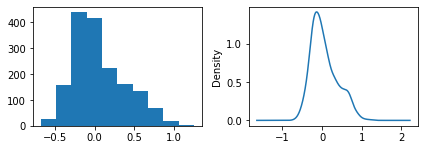

In [14]:
# plotting Histogram

import matplotlib.pyplot as plt
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind = 'kde')
plt.tight_layout()



In [15]:
# Making the dataset in the format YYYY-MM-DD


dataset['Month'] = pd.to_datetime(dataset['Month']) 

In [16]:
dataset

,Month,Value
0,1880-01-01,-0.01
1,1880-02-01,-0.13
2,1880-03-01,-0.14
3,1880-04-01,-0.06
4,1880-05-01,-0.08
5,1880-06-01,-0.18
6,1880-07-01,-0.16
7,1880-08-01,-0.09
8,1880-09-01,-0.10
9,1880-10-01,-0.19


In [17]:
# Removing the index for getting the yyy or months on x axsis  for the above graph

dataset.set_index('Month', inplace=True)

In [18]:
dataset_clean=dataset

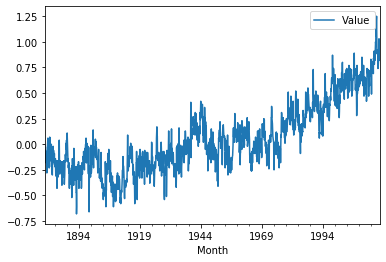

In [19]:
dataset.plot()

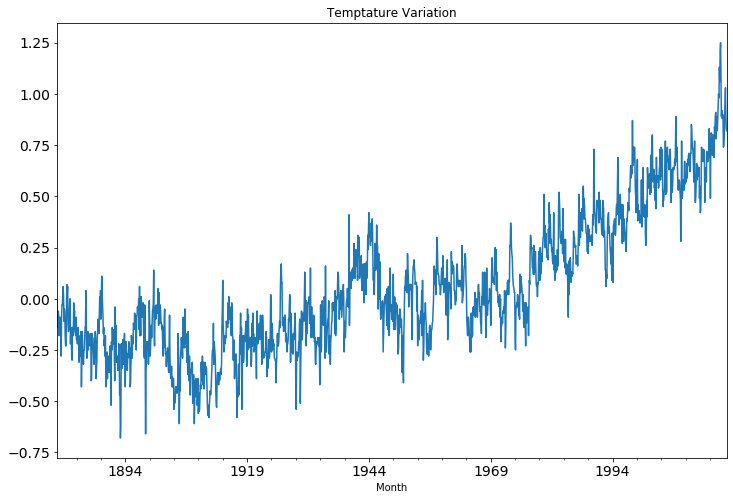

In [20]:
dataset.Value.plot(figsize=(12,8), title= 'Temptature Variation', fontsize=14)
plt.savefig('month_ridership.png', bbox_inches='tight')

c:\users\shubham\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

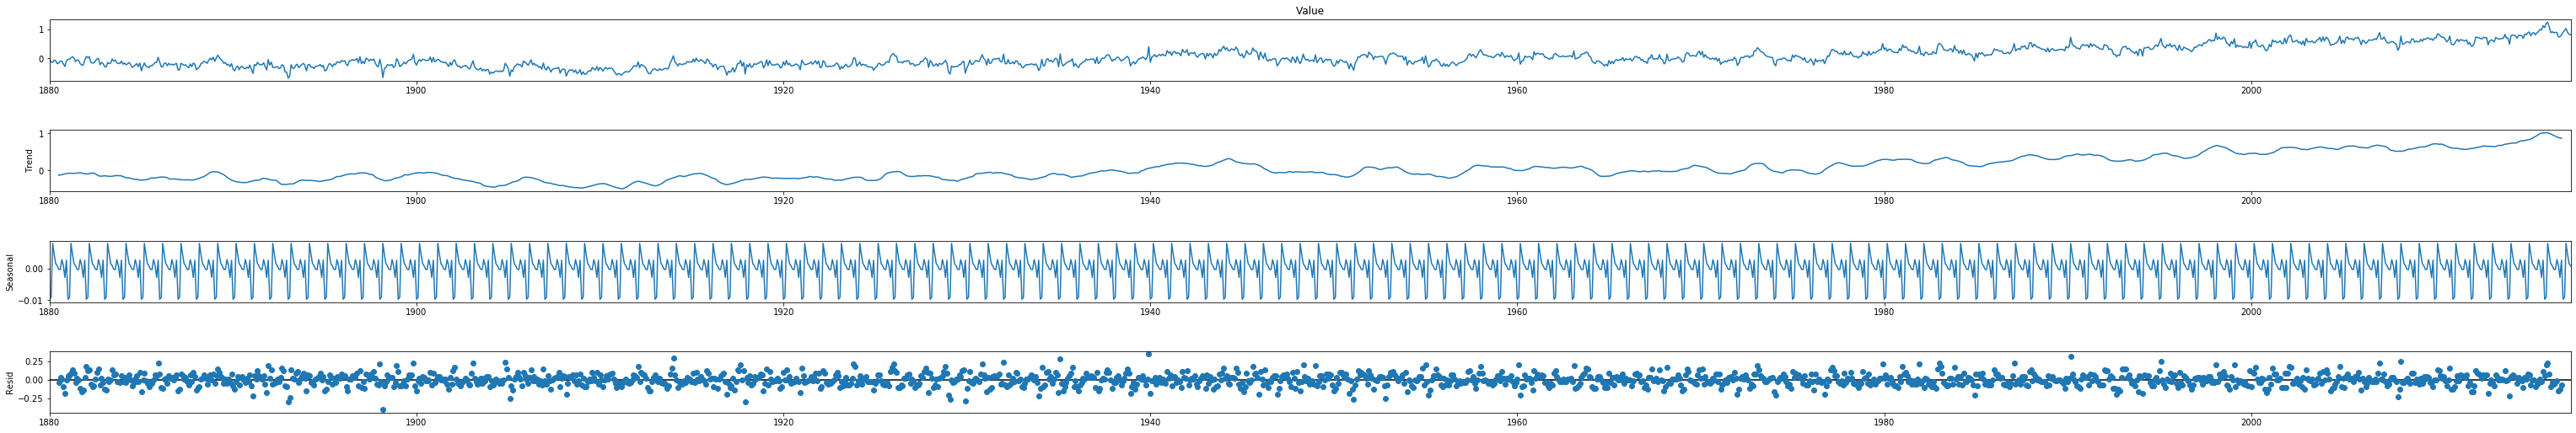

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataset.Value, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(50, 8)

In [22]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)

range(0, 2)


In [23]:
import itertools
import warnings


In [24]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [25]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
y=dataset

In [27]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataset_clean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1093.0872187144305
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:74.05823384079036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1171.9970961012525
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-1646.9345168594518
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-1243.9829693058648
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-1672.481970091622
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-1469.2305555331789
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1643.4931677474474
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-387.015212300037
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-983.5968791741487
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1670.2687515699154
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-2266.240162565265
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1800.1618089406954
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-2294.298740600394
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-2036.2948708773736
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-2260.251633843258
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-2774.940407649736
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-2748

In [28]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c3=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            c3.append( results.aic)
        except:
            continue

In [29]:
c3

[1093.0872187144305,
 74.05823384079036,
 -1171.9970961012525,
 -1646.9345168594518,
 -1243.9829693058648,
 -1672.481970091622,
 -1469.2305555331789,
 -1643.4931677474474,
 -387.015212300037,
 -983.5968791741487,
 -1670.2687515699154,
 -2266.240162565265,
 -1800.1618089406954,
 -2294.298740600394,
 -2036.2948708773736,
 -2260.251633843258,
 -2774.940407649736,
 -2748.3235143667625,
 -1648.88045836597,
 -2672.416292967831,
 -2751.281083190557,
 -2752.044552513562,
 -2176.488182954019,
 -2668.683868350798,
 -3067.98259958808,
 -3041.442924926137,
 -1954.1495300627744,
 -2972.3225583751664,
 -3047.157476091266,
 -3049.0192877395475,
 -2493.7555800209107,
 -2971.278515570713,
 -2811.3918113624895,
 -2787.321597230686,
 -1986.3152359380588,
 -2829.8190213277335,
 -2788.2515069240953,
 -2851.5028111048505,
 -2456.8615027153473,
 -2827.030745115381,
 -3074.5673638463213,
 -3048.0216206786226,
 -2070.6038863511726,
 -3001.2278211035805,
 -3051.4921061067494,
 -3057.5410854939605,
 -2576.236651

In [30]:
import numpy as np
index_min = np.argmin(c3)

In [31]:
import numpy as np
index_min = np.argmin(c3)

In [32]:
index_min


56

In [33]:
c3[index_min]

-3088.8759237163245

In [34]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1093.0872187144305
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:74.05823384079036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1171.9970961012525
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-1646.9345168594518
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-1243.9829693058648
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-1672.481970091622
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-1469.2305555331789
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1643.4931677474474
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-387.015212300037
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-983.5968791741487
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1670.2687515699154
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-2266.240162565265
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1800.1618089406954
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-2294.298740600394
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-2036.2948708773736
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-2260.251633843258
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-2774.940407649736
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-2748

In [35]:
c4[index_min]


'ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-3088.8759237163245'

In [36]:
order1=c4[index_min][6:13]
order1


'1, 1, 1'

In [37]:
order1=[int(s) for s in order1.split(',')]
order1

[1, 1, 1]

In [38]:

seasonal_order1=c4[index_min][16:27]
seasonal_order1

'0, 0, 0, 12'

In [39]:
#in this model we have to try to get an les values for AIC and BIC lesser values are mor benefical for us
#on above we are calculating p,d,q values but these values ar nor accurate 
#so we have to applr permunation and combination for this and changing the values of the order(p,d,q) and seasonal_order(p,d,q,months)
# up to the getting the lesser values of the AIC and BIC 
mod = sm.tsa.SARIMAX(dataset['Value'], trend='n', order=(1,1,1), seasonal_order=(0,0,0,12))
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 1650
Model:               SARIMAX(1, 1, 1)   Log Likelihood                1549.641
Date:                Fri, 03 Apr 2020   AIC                          -3093.283
Time:                        13:15:15   BIC                          -3077.059
Sample:                    01-01-1880   HQIC                         -3087.267
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2683      0.040      6.780      0.000       0.191       0.346
ma.L1         -0.7151      0.030    -23.943      0.000      -0.774      -0.657
sigma2         0.0089      0.000     35.861      0.0

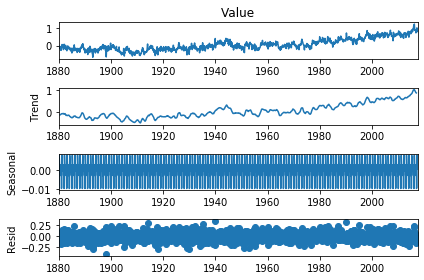

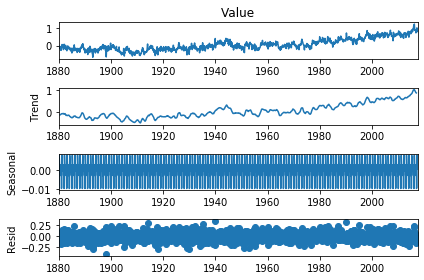

In [40]:
# Model is for checking the trend and seasionality

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Value'], freq=12) # freq=months
decomposition.plot()

# To check the Data is staionary or not ? By Using ADF(Agumented Dickey     Fuller Test)

In [41]:
# Agumented Dickey Fuller Test


from statsmodels.tsa.stattools import adfuller 

In [42]:
# secnod value is important 0.9918 which is Greater than the 0.05 hence the data is not staitionary

adfuller(dataset['Value'])

(-0.34863496750489525,
 0.9183281369985403,
 24,
 1625,
 {'1%': -3.434380559955255,
  '5%': -2.8633202588932547,
  '10%': -2.567717771455621},
 -3054.9075375567154)

In [43]:
# Another Funcation is Created for the checking the data is staionary or not


def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic', 'P-value', '#Lags','No of Obs']
    for value, label in zip(result,labels):
        print(label + ":" + str(value))
        
    if result[1]<=0.05:
        print('Strong evidence against Null hypothesis and my time series is stationary')
    else: 
        print('Weak evidence against Null hypothesis and my time series is not stationary')

In [44]:
adf_check(dataset['Value'])

Augmented Dickey Fuller Test
ADF Test Statistic:-0.34863496750489525
P-value:0.9183281369985403
#Lags:24
No of Obs:1625
Weak evidence against Null hypothesis and my time series is not stationary


# 1) Trend(1month)

In [45]:
# calculating the d=1 value
# shift is for calclating month to month i.e.month2-month1

dataset['Value First Diff'] = dataset['Value'] - dataset['Value'].shift(1)

In [46]:
dataset

,Value,Value First Diff
Month,,
1880-01-01,-0.01,NaN
1880-02-01,-0.13,-0.12
1880-03-01,-0.14,-0.01
1880-04-01,-0.06,0.08
1880-05-01,-0.08,-0.02
1880-06-01,-0.18,-0.10
1880-07-01,-0.16,0.02
1880-08-01,-0.09,0.07
1880-09-01,-0.10,-0.01


In [47]:
# Checking for the Value First Diff valid or not
# value is6.711743406066544*e-22 means in expoential form i.e.0.0000000000.6711743406066544
# so the vlaue is less than p<0.05 it is valid
# Hence the Time Series  is Staionary

adf_check(dataset['Value First Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-11.8648872074612
P-value:6.711743406069051e-22
#Lags:23
No of Obs:1625
Strong evidence against Null hypothesis and my time series is stationary


# 2) Seasionality(12month)

In [48]:
# chere we are calculating for the Seasionality for 12 month
#At Particular month data is varying so we calulating Seainality
# In Time series Anlysis we are Calculating for the 1)Trend 2)Seasionality 
#but we cant determine the time Series Anlysis for the 3)cyclic 4)Iregular

dataset['Seasonal Difference'] = dataset['Value']-dataset['Value'].shift(12)

In [49]:
dataset

,Value,Value First Diff,Seasonal Difference
Month,,,
1880-01-01,-0.01,NaN,NaN
1880-02-01,-0.13,-0.12,NaN
1880-03-01,-0.14,-0.01,NaN
1880-04-01,-0.06,0.08,NaN
1880-05-01,-0.08,-0.02,NaN
1880-06-01,-0.18,-0.10,NaN
1880-07-01,-0.16,0.02,NaN
1880-08-01,-0.09,0.07,NaN
1880-09-01,-0.10,-0.01,NaN


In [50]:
# Checking the Data is Stationary or not for the Seasionality

adf_check(dataset['Seasonal Difference'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-10.71272470611878
P-value:3.3001989023644952e-19
#Lags:24
No of Obs:1613
Strong evidence against Null hypothesis and my time series is stationary


# Calculating p for Auto Regressor(AR) and q for Mean Average(MA)

In [51]:
# acf is for MA(Moving Average) and pacf is for AR(Auto Regressor)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

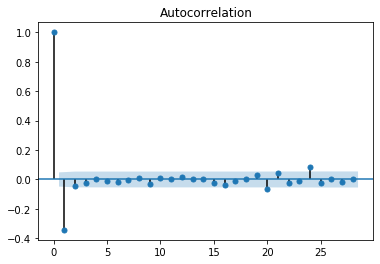

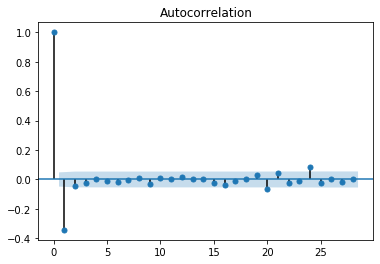

In [52]:
# q for Mean Average(MA)

plot_acf(dataset['Value First Diff'].dropna(), lags=28)
#q=1

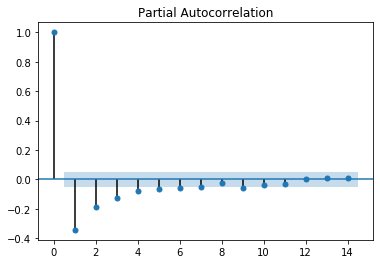

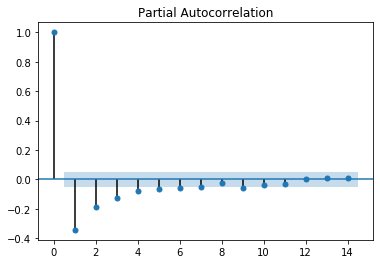

In [53]:
# Calculating p for Auto Regressor(AR)

plot_pacf(dataset['Value First Diff'].dropna(),lags=14)
#p=1

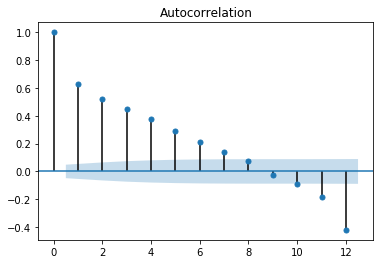

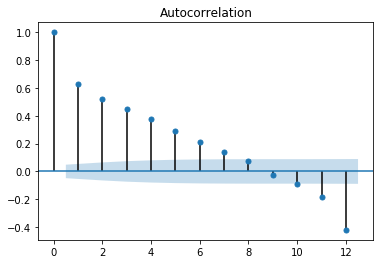

In [54]:
plot_acf(dataset['Seasonal Difference'].dropna(), lags=12)

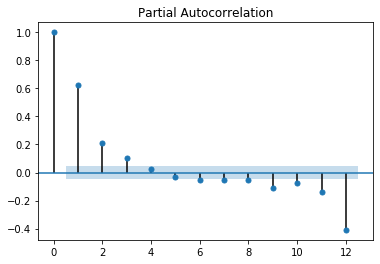

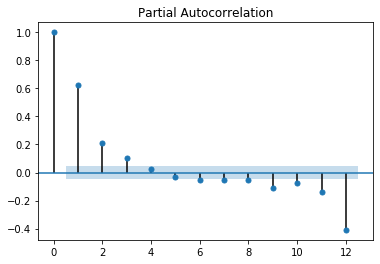

In [55]:
# Seasonal 

plot_pacf(dataset['Seasonal Difference'].dropna(), lags=12)
#P=2

# Applying ARIMA Model

In [56]:


from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [57]:
#in this model we have to try to get an les values for AIC and BIC lesser values are mor benefical for us
#on above we are calculating p,d,q values but these values ar nor accurate 
#so we have to applr permunation and combination for this and changing the values of the order(p,d,q) and seasonal_order(p,d,q,months)
# up to the getting the lesser values of the AIC and BIC 
mod = sm.tsa.SARIMAX(dataset['Value'], trend='n', order=(1,1,1), seasonal_order=(1,1,0,12))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Value   No. Observations:                 1650
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                1265.203
Date:                             Fri, 03 Apr 2020   AIC                          -2522.407
Time:                                     13:15:23   BIC                          -2500.804
Sample:                                 01-01-1880   HQIC                         -2514.394
                                      - 06-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1359      0.044      3.112      0.002       0.050       0.222
ma.L1         -0.6030      

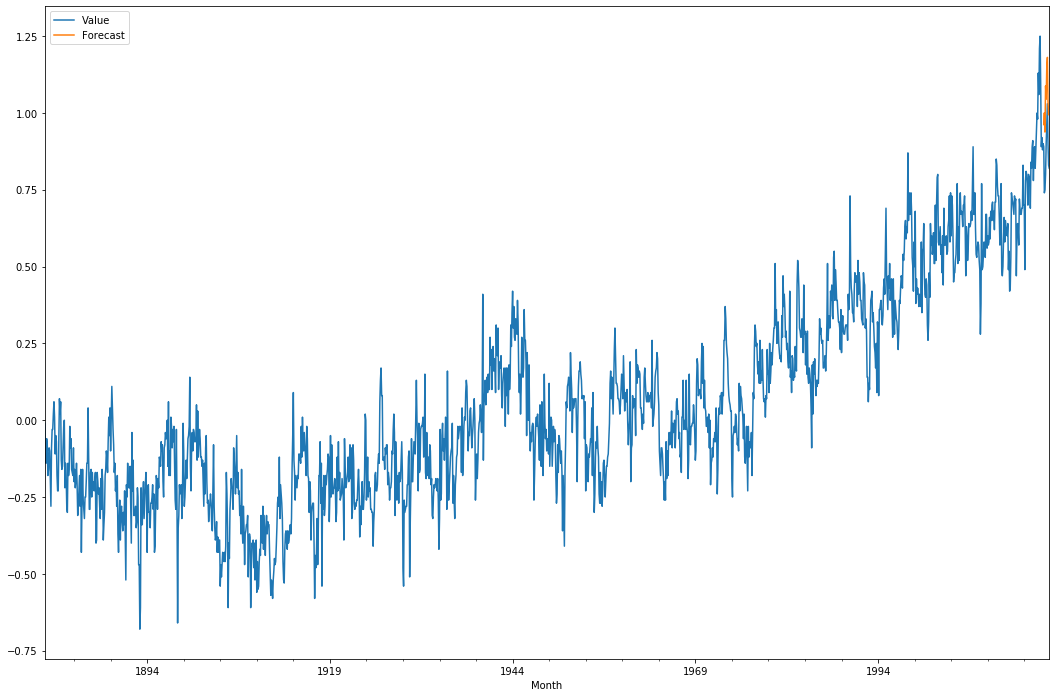

In [58]:
# checking the values of previous year graph in blue color and orange color is ur predidcting line of next 2 year data
# we have check until we got an same line on the blue color

dataset['Forecast'] = results.predict(start=1640, end=1850, dynamic=True)
dataset[['Value','Forecast']].plot(figsize=(18, 12))


In [59]:
len(dataset)

1650

In [93]:
# Making an dummy for the next two year

from pandas.tseries.offsets import DateOffset
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(0,60)]

In [94]:
future_dates

[Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-

In [95]:
# taking the same columns as present in the our abobe dataset

future_dates_df = pd.DataFrame(index=future_dates[1:],columns=dataset.columns)

In [96]:
future_dates_df

,Value,Value First Diff,Seasonal Difference,Forecast
2017-07-01,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN
2018-02-01,NaN,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN


In [97]:
# Combining the dummies next two year data to the original dtat set

future_df = pd.concat([dataset,future_dates_df])

In [98]:
future_df

,Value,Value First Diff,Seasonal Difference,Forecast
1880-01-01,-0.01,NaN,NaN,NaN
1880-02-01,-0.13,-0.12,NaN,NaN
1880-03-01,-0.14,-0.01,NaN,NaN
1880-04-01,-0.06,0.08,NaN,NaN
1880-05-01,-0.08,-0.02,NaN,NaN
1880-06-01,-0.18,-0.10,NaN,NaN
1880-07-01,-0.16,0.02,NaN,NaN
1880-08-01,-0.09,0.07,NaN,NaN
1880-09-01,-0.10,-0.01,NaN,NaN
1880-10-01,-0.19,-0.09,NaN,NaN


In [99]:
len(dataset)

1650

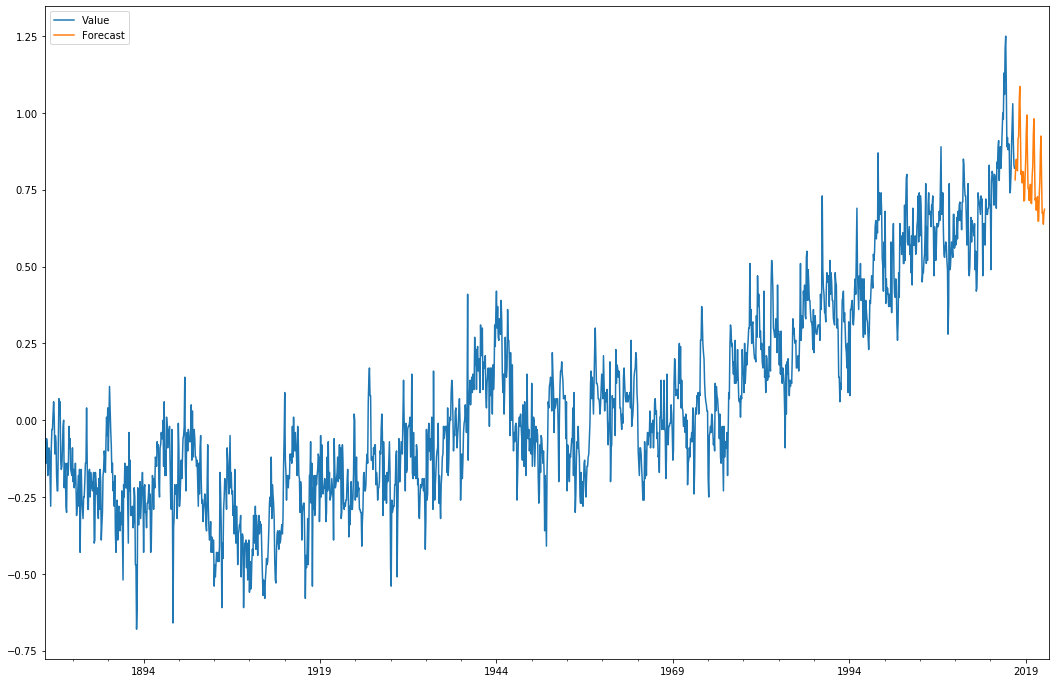

In [100]:
# Filling the result into dummies of next two year datatset values starts from 145 and ending to the 151


future_df['Forecast'] = results.predict(start=1650, end=1700, dynamic=True)
future_df[['Value','Forecast']].plot(figsize=(18, 12))

In [101]:
len(dataset)

1650

In [102]:
future_df

,Value,Value First Diff,Seasonal Difference,Forecast
1880-01-01,-0.01,NaN,NaN,NaN
1880-02-01,-0.13,-0.12,NaN,NaN
1880-03-01,-0.14,-0.01,NaN,NaN
1880-04-01,-0.06,0.08,NaN,NaN
1880-05-01,-0.08,-0.02,NaN,NaN
1880-06-01,-0.18,-0.10,NaN,NaN
1880-07-01,-0.16,0.02,NaN,NaN
1880-08-01,-0.09,0.07,NaN,NaN
1880-09-01,-0.10,-0.01,NaN,NaN
1880-10-01,-0.19,-0.09,NaN,NaN


In [70]:
import os

In [71]:
os.getcwd()

'H:\\My Project College\\MY Project'

In [72]:
future_df.to_csv("Temprature Values.csv")